In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Cleaning

In [5]:
unneeded_columns = ['id', 'name', 'host_id', 'host_name','last_review']

df.drop(unneeded_columns, axis=1, inplace = True)
df.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [6]:

df['reviews_per_month'] = df['reviews_per_month'].fillna(0,inplace=True)

<Axes: xlabel='price', ylabel='Count'>

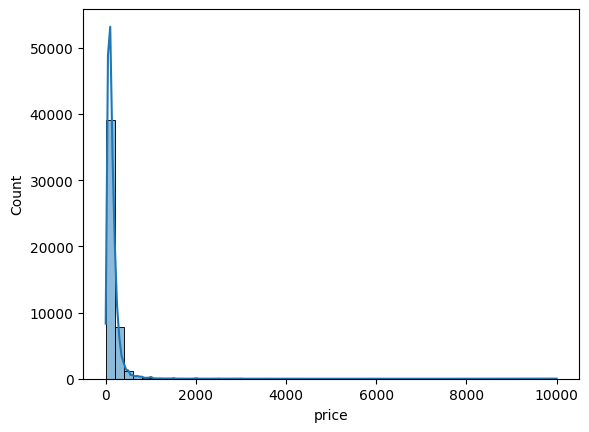

In [7]:
sns.histplot(x=df.price,kde=True,bins=50)
#plt.show()

Text(0.5, 1.0, 'Room Type Frequency')

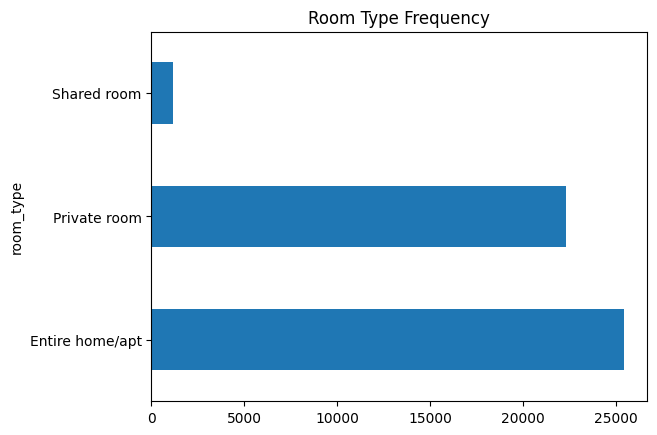

In [8]:
df.room_type.value_counts().plot.barh()
plt.title('Room Type Frequency')
#plt.show()

Text(0.5, 1.0, 'Neighbourhood Group Frequency')

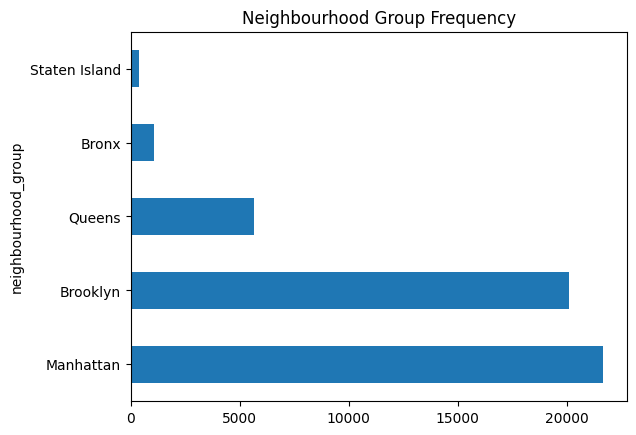

In [9]:
df.neighbourhood_group.value_counts().plot.barh().set_title('Neighbourhood Group Frequency')


In [ ]:
# f,ax = plt.subplots(figsize=(15,6))
# ax = sns.countplot(x=df.neighbourhood_group,palette="muted")
# plt.show()

In [ ]:
# sns.countplot(x=df['room_type'], palette="plasma")
# fig = plt.gcf()
# fig.set_size_inches(8,5)
# plt.title('Room Type')

Text(0.5, 1.0, 'Pie Price Graphic Of Neighbourhood Group')

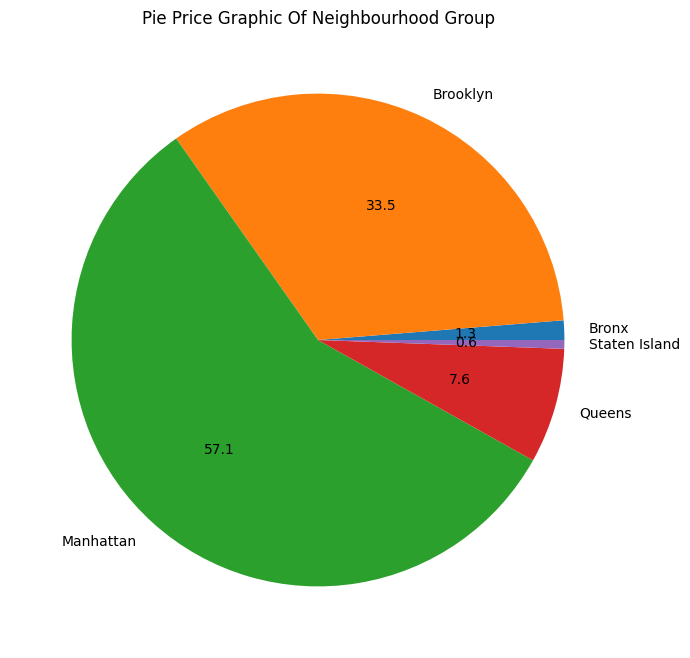

In [10]:
df.groupby('neighbourhood_group').sum().plot.pie(y='price',
                                                 autopct='%.1f', 
                                                 ylabel='',
                                                 legend=False,
                                                 figsize=(8,8)).set_title('Pie Price Graphic Of Neighbourhood Group')

Text(0.5, 1.0, 'Pie Availability 365 Graphic Of Neighbourhood Group')

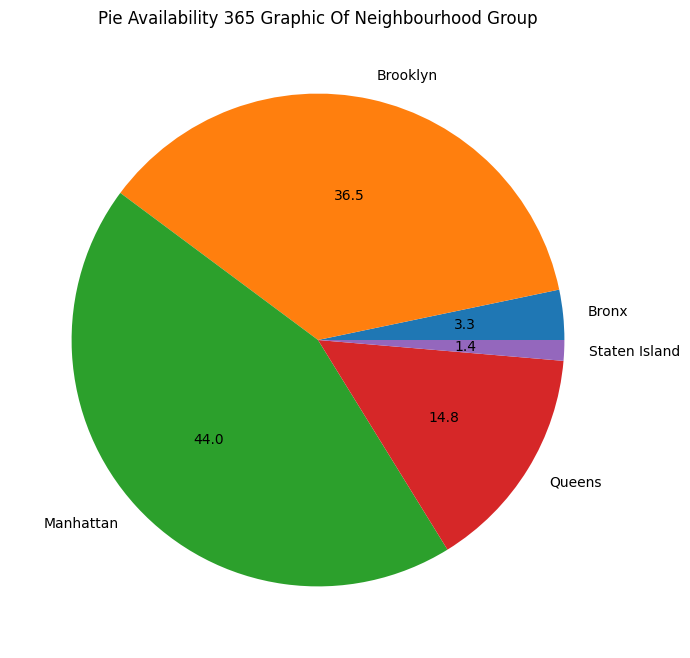

In [11]:
df.groupby('neighbourhood_group').sum().plot.pie(y='availability_365',
                                                 autopct='%.1f', 
                                                 ylabel='',
                                                 legend=False,
                                                 figsize=(8,8)).set_title('Pie Availability 365 Graphic Of Neighbourhood Group')

Text(0.5, 1.0, 'Pie Availability 365 Graphic Of Neighbourhood Group')

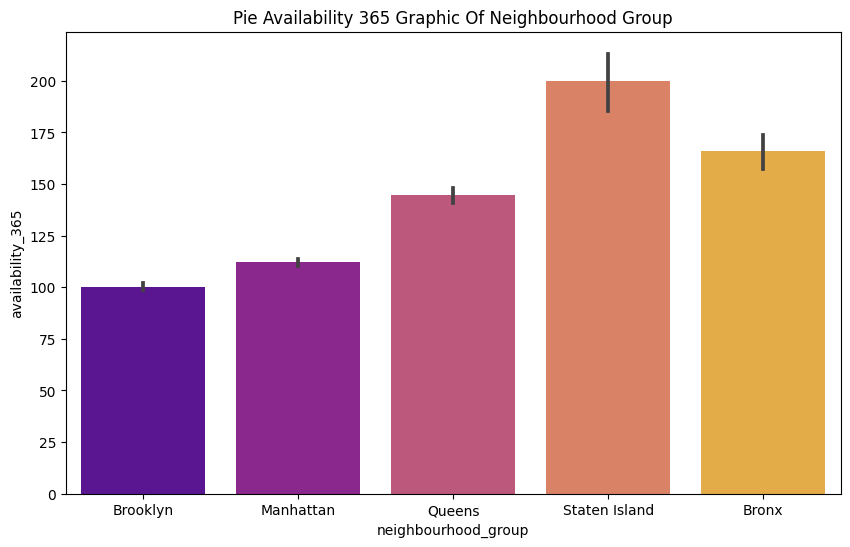

In [12]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df, x='neighbourhood_group',y='availability_365',palette='plasma')
plt.title('Pie Availability 365 Graphic Of Neighbourhood Group')

Text(0.5, 1.0, 'Neighbourhood Group For Price And Availability')

<Figure size 1200x800 with 0 Axes>

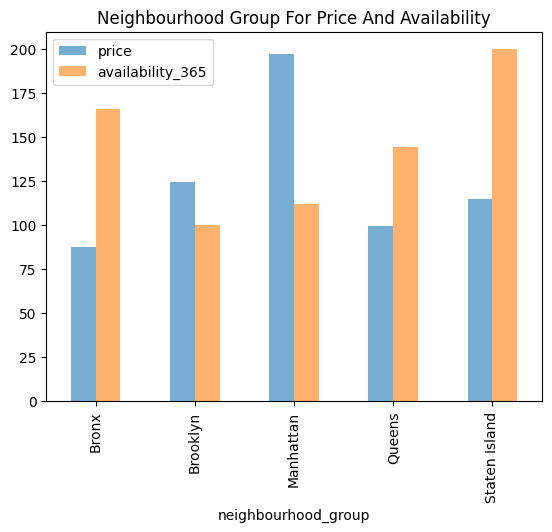

In [13]:
plt.figure(figsize=(12,8))
df.groupby('neighbourhood_group').agg({'price':'mean','availability_365':'mean'}).plot.bar(alpha=.6)
plt.title('Neighbourhood Group For Price And Availability')

In [14]:
df_1_group = df.groupby(by=['neighbourhood_group','room_type']).agg({'price':'mean'})
df_1_group.reset_index(inplace=True)
print(df_1_group)

   neighbourhood_group        room_type       price
0                Bronx  Entire home/apt  127.506596
1                Bronx     Private room   66.788344
2                Bronx      Shared room   59.800000
3             Brooklyn  Entire home/apt  178.327545
4             Brooklyn     Private room   76.500099
5             Brooklyn      Shared room   50.527845
6            Manhattan  Entire home/apt  249.239109
7            Manhattan     Private room  116.776622
8            Manhattan      Shared room   88.977083
9               Queens  Entire home/apt  147.050573
10              Queens     Private room   71.762456
11              Queens      Shared room   69.020202
12       Staten Island  Entire home/apt  173.846591
13       Staten Island     Private room   62.292553
14       Staten Island      Shared room   57.444444


Text(0.5, 1.0, 'Neighbourhood Group For Price And Room Type')

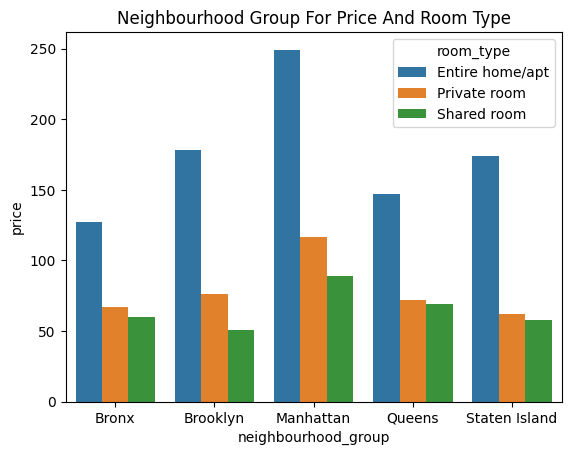

In [15]:
sns.barplot(x=df_1_group.neighbourhood_group,y=df_1_group.price,hue=df_1_group.room_type)
plt.title('Neighbourhood Group For Price And Room Type')

<Axes: xlabel='price', ylabel='availability_365'>

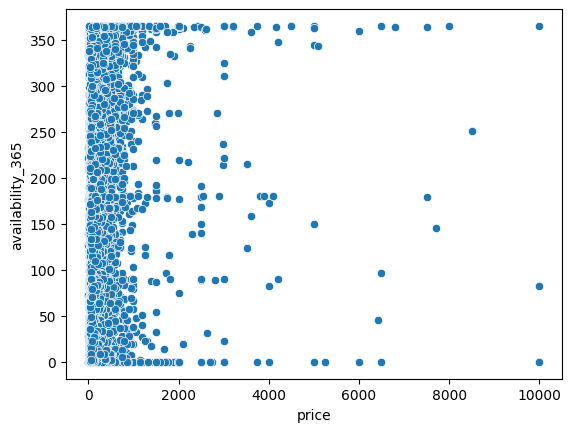

In [17]:
sns.scatterplot(x=df.price,y=df.availability_365)

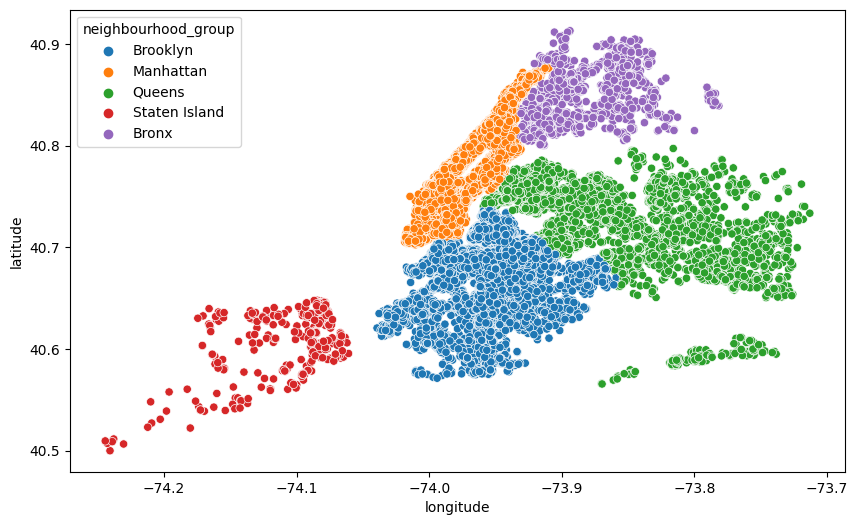

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)
plt.ioff()

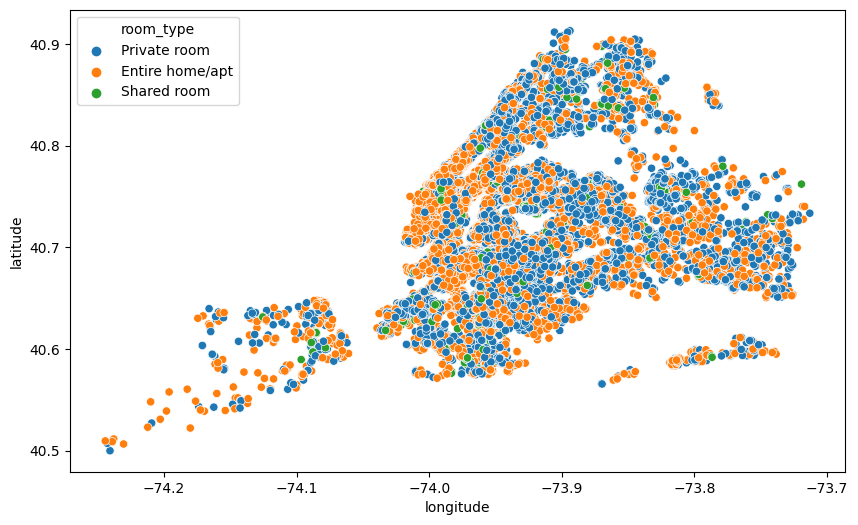

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.room_type)
plt.ioff()
plt.show()

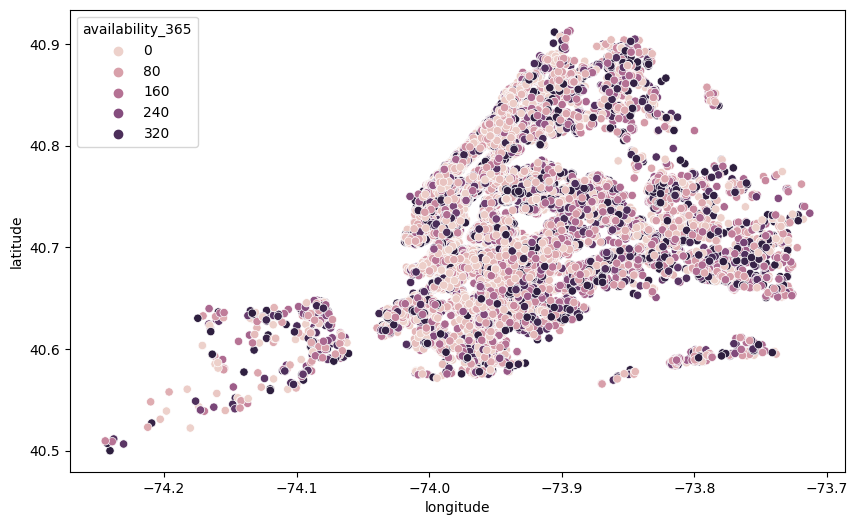

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x=df.longitude,y=df.latitude,hue=df.availability_365)
plt.ioff()
plt.show()

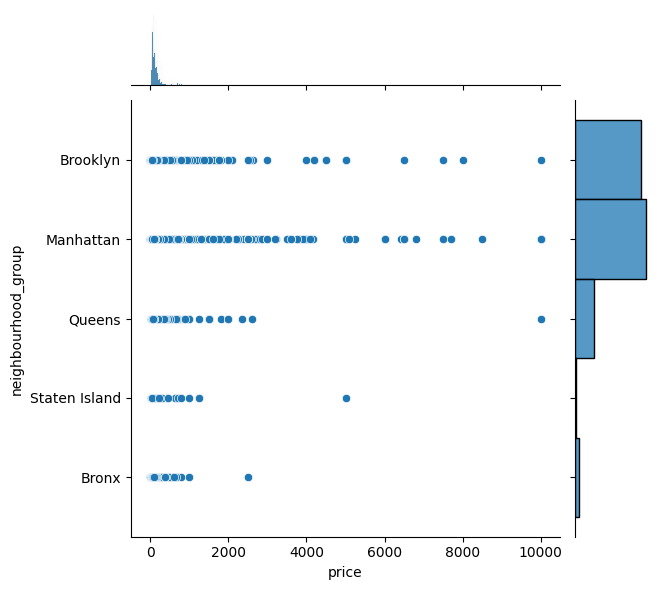

In [23]:
sns.jointplot(x='price',y='neighbourhood_group',data=df)
plt.show()

C:\Users\arma\AppData\Local\Temp\ipykernel_15004\3454555422.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1)


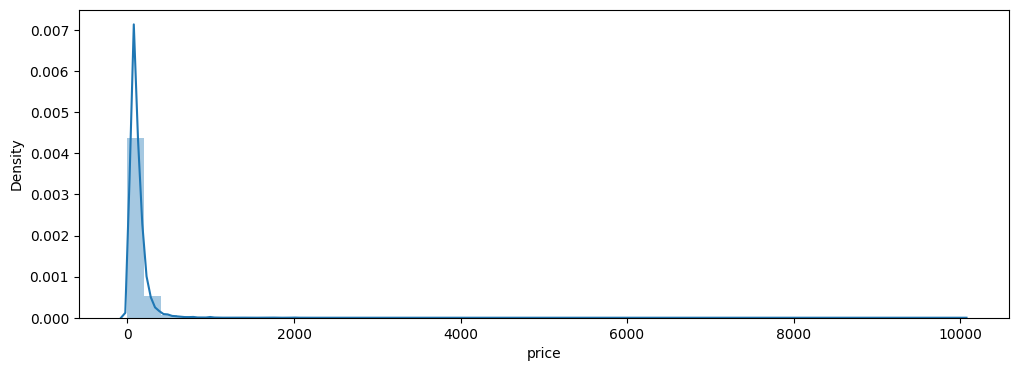

In [30]:
f,ax = plt.subplots(figsize=(12,4))
df1 = df[df.neighbourhood_group=="Brooklyn"]['price']
sns.distplot(df1)
plt.show()

In [31]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## This error pop's up when we try to get dataset's correlation with string values exist

In [32]:
df.corr()

ValueError: could not convert string to float: 'Brooklyn'

## No worries, this code will transform your str values to 'categorical values'

In [34]:
df['neighbourhood_group'] = df.neighbourhood_group.astype('category').cat.codes
df['neighbourhood'] = df.neighbourhood.astype('category').cat.codes
df['room_type'] = df.room_type.astype('category').cat.codes
df['reviews_per_month'] = df['reviews_per_month'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  int8   
 1   neighbourhood                   48895 non-null  int16  
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  int8   
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               0 non-null      float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int16(1), int64(5), int8(2)
memory usage: 3.2 MB


In [35]:
df.describe()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,0.0,48895.000000,48895.000000
mean,1.675345,107.122732,40.728949,-73.952170,0.504060,152.720687,7.029962,23.274466,NaN,7.143982,112.781327
std,0.735816,68.743096,0.054530,0.046157,0.545379,240.154170,20.510550,44.550582,NaN,32.952519,131.622289
min,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,NaN,1.000000,0.000000
25%,1.000000,51.000000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,NaN,1.000000,0.000000
50%,2.000000,94.000000,40.723070,-73.955680,0.000000,106.000000,3.000000,5.000000,NaN,1.000000,45.000000
75%,2.000000,178.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,NaN,2.000000,227.000000
max,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,NaN,327.000000,365.000000


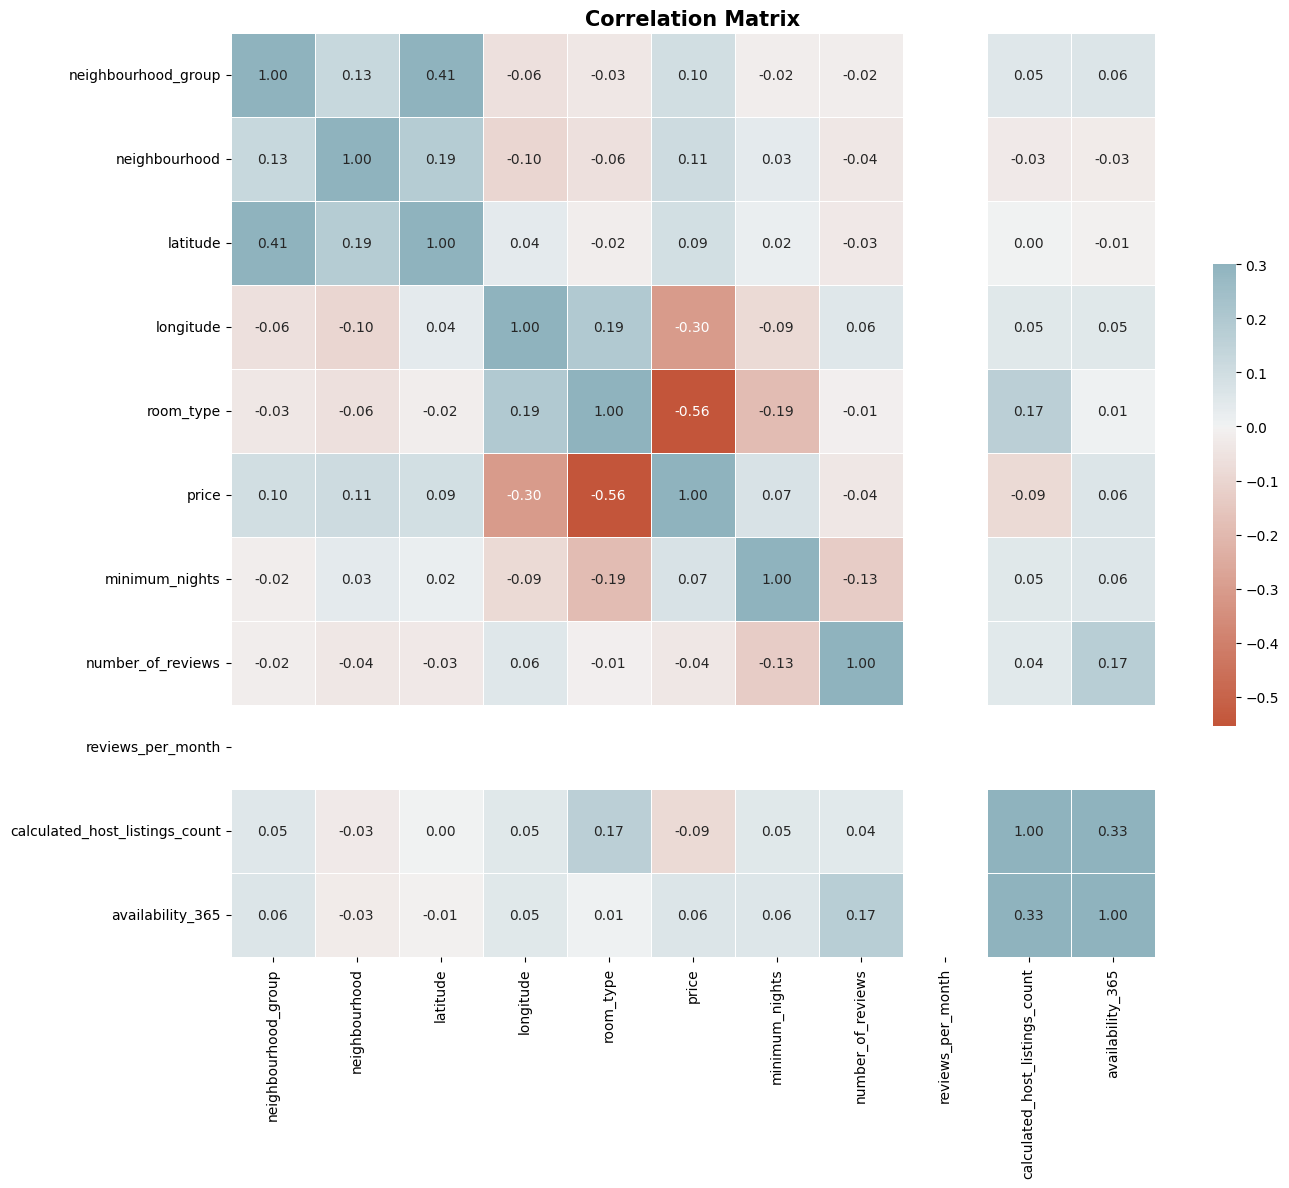

In [36]:
corr = df.corr(method='kendall')
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')
plt.show()

In [ ]:
df.columns